### 1) Find the amount at which goals become far less likely to be reached.
     

In [1]:
import pandas as pd
location="kickstarter.xls"
df=pd.read_excel(location)
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
df.count()

ID                  65535
name                65529
category            65535
main_category       65535
currency            65535
deadline            65535
goal                65535
launched            65535
pledged             65535
state               65535
backers             65535
country             65535
usd pledged         64904
usd_pledged_real    65535
usd_goal_real       65535
dtype: int64

In [5]:
df["state"].value_counts()*100/len(df)

failed        52.123293
successful    35.712215
canceled      10.061799
undefined      0.898756
live           0.717174
suspended      0.486763
Name: state, dtype: float64

In [6]:
df['usd_goal_real'].min(), df['usd_goal_real'].max(), df['usd_goal_real'].mean()

(0.75, 166361390.71, 41749.10442938886)

In [7]:
bins = [0, 5000, 10000,20000,50000,100000,1000000,200000000]
df['usd_goal_realBin']=pd.cut(df['usd_goal_real'],bins)

In [8]:
import matplotlib.pyplot as plt

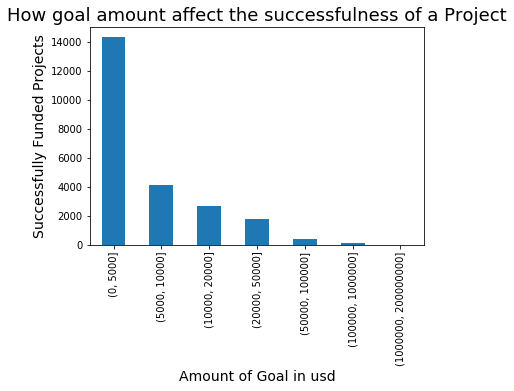

In [13]:
ax=df[df["state"]=="successful"]['usd_goal_realBin'].value_counts().plot(kind='bar')
ax.set_title("How goal amount affect the successfulness of a Project", fontsize=18)
ax.set_ylabel("Successfully Funded Projects", fontsize=14)
ax.set_xlabel("Amount of Goal in usd", fontsize=14);


### When the amount of goal is above $50,0000 the chance of it being fully fundede decreases signficantly.

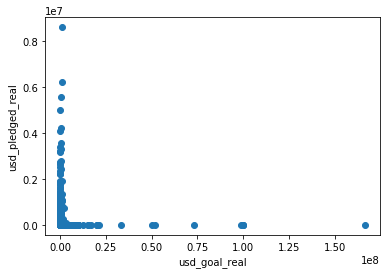

In [22]:
plt.scatter (df['usd_goal_real'], df['usd_pledged_real'],)

plt.xlabel('usd_goal_real')
plt.ylabel('usd_pledged_real')
plt.show()

In [26]:
import statsmodels.formula.api as sm
result = sm.ols(formula='usd_pledged_real ~ usd_goal_real', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       usd_pledged_real   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.887
Date:                Sat, 30 Jun 2018   Prob (F-statistic):              0.169
Time:                        09:13:58   Log-Likelihood:            -8.3516e+05
No. Observations:               65535   AIC:                         1.670e+06
Df Residuals:                   65533   BIC:                         1.670e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9203.8198    323.852     28.420      0.000    8569.071    9838.569
usd_goal_real     0.0004      0.000      1.374      0.169      -0.000       0.001
==============================================================================
Omnibus:                   202064.975   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      29981376119.058
Skew:                          47.298   Prob(JB):                         0.00
Kurtosis:                    3315.209   Cond. No.                     1.14e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2) Find the number of backers at which kickstarters become far more likely to be funded

In [41]:
df['backers'].min(),df['backers'].max(),df['backers'].mean()

(0, 85581, 104.75928892957961)

In [30]:
bins = [0, 5, 10,20,30,400,500,1000,2000,3000,4000,5000,10000]
df['backersBin']=pd.cut(df['backers'],bins)

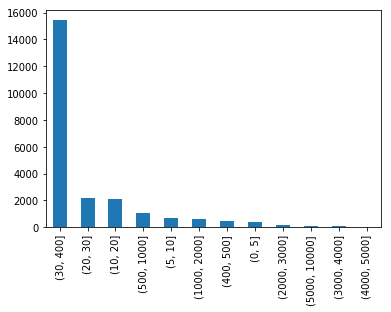

In [31]:
df[df["state"]=="successful"]['backersBin'].value_counts().plot(kind='bar')

In [32]:
bins = [0, 5, 10,20,50,100,150,200,250,300,400,450,500,550,1000]
df['backersBin']=pd.cut(df['backers'],bins)

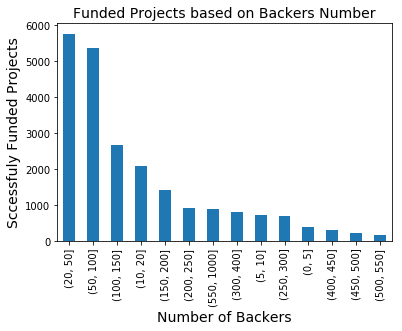

In [43]:
ax=df[df["state"]=="successful"]['backersBin'].value_counts().plot(kind='bar')
ax.set_title("Funded Projects based on Backers Number", fontsize=14)
ax.set_ylabel("Sccessfuly Funded Projects", fontsize=14)
ax.set_xlabel("Number of Backers", fontsize=14);

### Based on the bar graph above if the total number of backers are bettween 20 and 100, then the Kickstarter project is more likely to be funded.

In [39]:
import statsmodels.formula.api as sm
result = sm.ols(formula='usd_pledged_real ~ backers', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       usd_pledged_real   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                 9.300e+04
Date:                Sat, 30 Jun 2018   Prob (F-statistic):               0.00
Time:                        09:40:04   Log-Likelihood:            -8.0621e+05
No. Observations:               65535   AIC:                         1.612e+06
Df Residuals:                   65533   BIC:                         1.612e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    890.4215    209.861      4.243      0.000     479.094    1301.750
backers       79.5135      0.261    304.966      0.000      79.002      80.024
==============================================================================
Omnibus:                   171131.893   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      21996980935.723
Skew:                          29.710   Prob(JB):                         0.00
Kurtosis:                    2840.627   Cond. No.                         812.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""